In [ ]:
import sympy
from sympy import  Point, Line, Plane, Point3D, solve, solveset
sympy.init_printing(use_unicode=False, wrap_line=False, no_global=True)

# Лабораторная работа 7
# Алгебра
https://docs.sympy.org/latest/search.html?q=geometry

## Прямые и плоскости в пространстве. Модуль Geometry
### Задание 1.
Даны точки: $A(3, -2, 3)$,  $B(-2, 3, 1)$, $C(1, -8, 6)$, $D(1, 2, 4)$, $F(-7, 8, -1)$.

Проверить, различны ли прямые $AB$ и $AF$, $BC$ и $CD$, $ABC$ и $ACF$, $ABC$ и $ACD$. 

In [ ]:
A = Point(3, -2, 3)
B = Point(-2, 3, 1)
C = Point(1, -8, 6)
D = Point(1, 2, 4)
F = Point(-7, 8, -1)
AB = Line(A, B)
AF = Line(A, F)
BC = Line(B, C)
CD = Line(C, D)
ABC = Plane(A, B, C)
ACF = Plane(A, C, F)
ACD = Plane(A, C, D)

In [ ]:
print(AB.is_similar(AF),
BC.is_similar(CD),
ABC.is_coplanar(ACF),
ABC.is_coplanar(ACD))

True False True False


###  Задание 2
Вывести на экран уравнение обеих биссектрис двугранных углов, образованных при пересечении плоскостей АВС и АСD.

Указание: расстояние от любой точки на биссектрисе до каждой из плоскостей АВС и АСD одинаково, полученное из этого уравнение описывает обе биссектрисы, упрощать его не нужно.

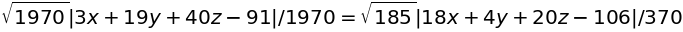

In [ ]:
from sympy.abc import x, y, z
P = Point(x, y, z)
sympy.Eq(ABC.distance(P), ACD.distance(P))

###  Задание 3
Построить плоскость, перпендикулярную плоскости АВС, проходящую через D и начало координат. Найти линию пересечения АВС и этой плоскости.

In [ ]:
from sympy import Matrix, Point, Line, Plane, Point3D
O1 = Point(0, 0, 0)
plane = ABC.perpendicular_plane(D, O1)
line = plane.intersection(ABC)
line

###  Задание 4
Найти пересечение плоскости АВС и прямой DK, где K(3,-2, 3).

In [ ]:
K = Point(3, -2, 3)
DK = Line(D, K)
T = ABC.intersection(DK)[0]
T

###  Задание 5
Проверить, что точка пересечения из Задания 4 лежит в плоскости AFC.

In [ ]:
AFC = Plane(A, F, C)
TFC = Plane(T, F, C)
if AFC.is_coplanar(TFC):
  print('лежит')
else:
  print('не лежит')

лежит


###  Задание 6
Даны точки: A(3, -2, 3),  B(-2, 3, 1), C(1, -8, 6), D(1, 2, 4), F(-7, 8, -1).

Составить словарь всех прямых (в нем должны быть и прямая АВ, и ВА!), каждая из которых проходит хотя бы через две заданные точки, ключ - сама прямая (Line), значение - список из имен ВСЕХ точек, лежащих на этой прямой. Вывести на экран имена только тех прямых, на которых лежит не менее трех точек из условия, а также список точек, лежащих на прямой.

In [ ]:
A = Point(3, -2, 3)
B = Point(-2, 3, 1)
C = Point(1, -8, 6)
D = Point(1, 2, 4)
F = Point(-7, 8, -1)
points = [A, B, C, D, F]
name = {A: 'A', B: 'B', C: 'C', D: 'D', F: 'F'}
line_name = {}

In [ ]:
d = dict()
for p1 in points:
  for p2 in points:
    if p1 != p2:
      d[Line(p1, p2)] = set()
      line_name[Line(p1, p2)] = name[p1] + name[p2]
for p1 in points:
  for p2 in points:
    for line in d.keys():
      if p1 != p2:
        if line.is_similar(Line(p1, p2)):
          d[line].add(name[p1])
          d[line].add(name[p2])
for line in d.keys():
  if len(d[line]) >= 3:
    print(line_name[line], ' '.join(d[line]))


AB A F B
AF A F B
BA A F B
BF A F B
FA A F B
FB A F B


### Индивидуальное задание

Даны точки: $A(19/2, -1, -3)$, $K(12, 0, -1)$, $P(15, 3, 3)$, $U(7, -2, -5)$ и $W(4, -5, -9)$.

Составить список lines_list, состоящий из  tuple из троек прямых, каждая из которых проходит через две (или более) заданные точки, причем все прямые пересекаются в одной точке. Совпадающие прямые не учитывать. 

In [ ]:
A = Point(19 / 2, -1, -3)
K = Point(12, 0, -1)
P = Point(15, 3, 3)
U = Point(7, -2, -5)
W = Point(4, -5, -9)
name = {A: 'A', K: 'K', P: 'P', U: 'U', W: 'W'}
line_name = {}
points = [A, K, P, U, W]

In [ ]:
from itertools import *


all_lines = []
lines_list = []
for points2 in combinations(points, 2):
      all_lines.append(Line(points2[0], points2[1]))
      line_name[Line(points2[0], points2[1])] = name[points2[0]] + name[points2[1]]
for lines3 in combinations(all_lines, 3):
    if lines3[0].intersection(lines3[1]) == lines3[0].intersection(lines3[2]):
      lines_list.append(tuple(line_name[line] for line in lines3))
display(lines_list)


[('AK', 'AP', 'AW'),
 ('AK', 'AP', 'PW'),
 ('AK', 'AW', 'PW'),
 ('AK', 'KP', 'KW'),
 ('AK', 'PU', 'UW'),
 ('AP', 'AU', 'KU'),
 ('AP', 'KP', 'PU'),
 ('AP', 'KW', 'UW'),
 ('AU', 'AW', 'PW'),
 ('AU', 'KP', 'KW'),
 ('AU', 'PU', 'UW'),
 ('AW', 'KP', 'PU'),
 ('AW', 'KW', 'UW'),
 ('KP', 'KU', 'KW'),
 ('KP', 'PU', 'PW'),
 ('KU', 'PU', 'UW'),
 ('KW', 'PW', 'UW')]